## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

### Importing Dataset

In [3]:
dataset= pd.read_csv("Heart_data/heart.csv")
# showing the first 5 rows
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Getting shape of data


In [4]:
dataset.shape

(1025, 14)

### basic information of data

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Data types of columns

In [6]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Columns description



    
    
    
    
    
    
    
    

   



  
   
   
   
   
   * age : age in years
   * sex : (1 = male; 0 = female)
   * chest pain type (4 values)
   * resting blood pressure : resting blood pressure (in mm Hg on admission to the hospital)
   * serum cholestoral in mg/dl
   * fasting blood sugar > 120 mg/dl : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * resting electrocardiographic results (values 0,1,2) : resting electrocardiographic results
   * thalach: maximum heart rate achieved
   * maximum heart rate achieved
   * exang : exercise induced angina (1 = yes; 0 = no)
   * oldpeak: ST depression induced by exercise relative to rest
   * slope: the slope of the peak exercise ST segment
   * ca: number of major vessels (0-3) colored by flourosopy
   * thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
   * target : 1 or 0

#### Check the distribution of target variable

<AxesSubplot:>

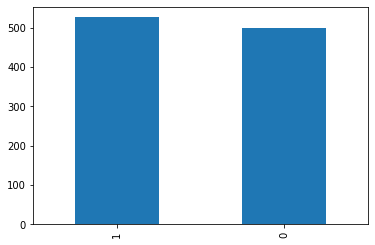

In [7]:
dataset["target"].value_counts().plot.bar()


The distribution of target values are almost the same.

1 --> Defective heart.

0 --> Healthy heart.

### Preprocessing of data

#### Check missing values

In [8]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The data has no missing values

#### Detecting outliers using describe function and boxplots

In [9]:
## Using describe() function
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


from above output we can see there is a big difference in chol 75% to max (275 to 564) similarly we can see in thalach,trestbps so it indicated there is an outliers

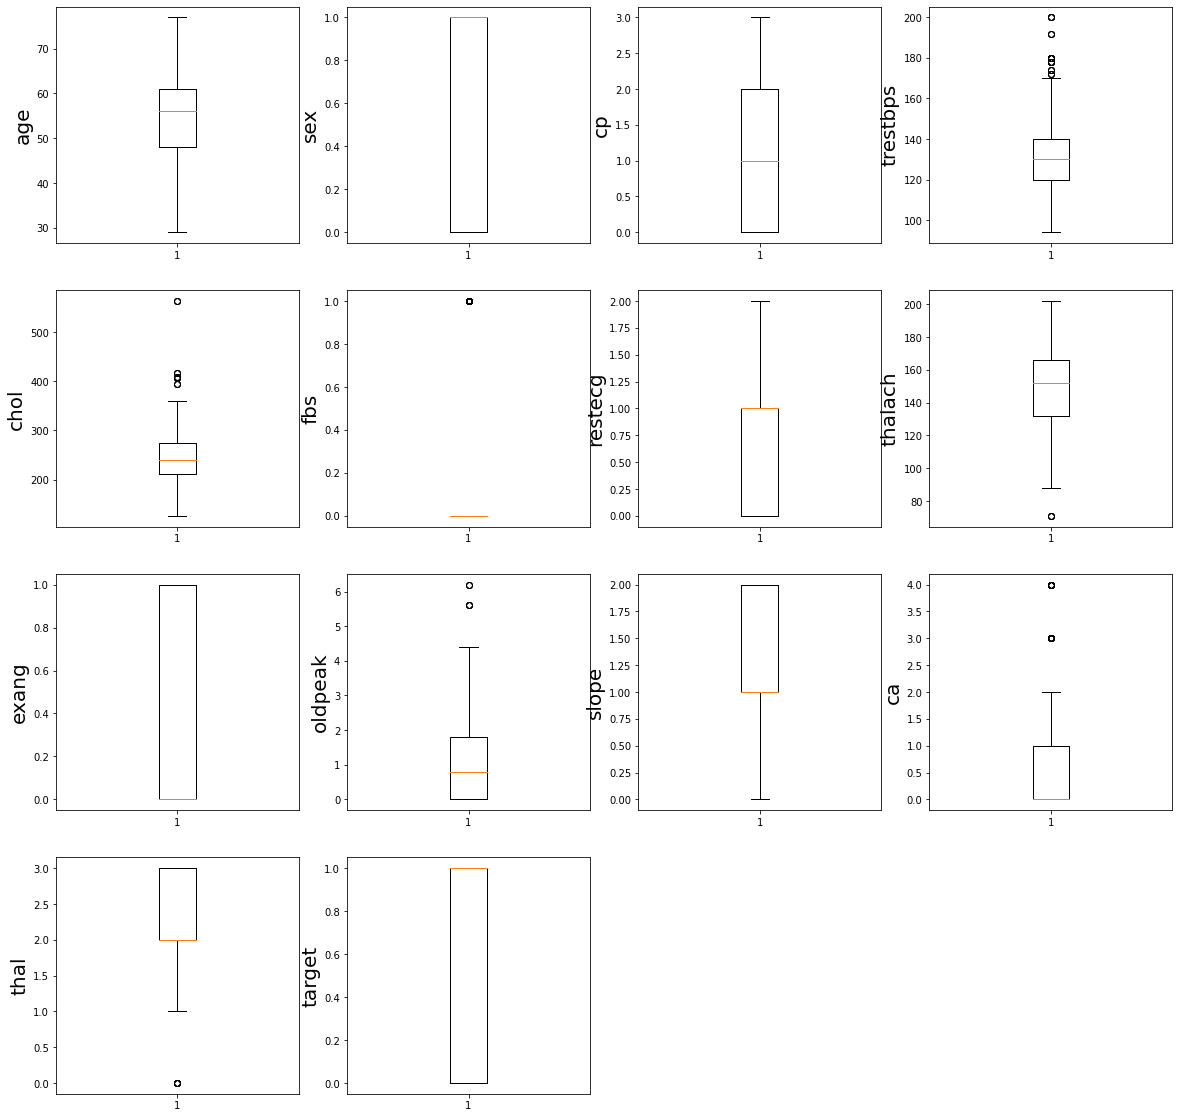

In [10]:
# Using boxplot
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in dataset.columns:
    plt.subplot(4,4,plotnumber)  ## 4 : rows , 4: columns , plotnumber : position of plot
    plt.boxplot(dataset[column])
    plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

####  Detecting and removing outliers from column trestbps¶


In [13]:
q3=dataset["trestbps"].quantile(q=0.75)
q1=dataset["trestbps"].quantile(q=0.25)
IQR=q3-q1
     ## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column trestbps :",IQR_upper_limit)
print("IQR_lower_limit for column trestbps :",IQR_lower_limit)

IQR_upper_limit for column trestbps : 170
IQR_lower_limit for column trestbps : 90


In [14]:
## find and treating outliers-both lower and upper end
dataset_off_trestbps_outliers=dataset[dataset["trestbps"]<IQR_upper_limit]
## check the new data size
dataset_off_trestbps_outliers.shape

(980, 14)

#### removing outliers from chol columns

In [15]:
q3=dataset_off_trestbps_outliers["chol"].quantile(q=0.75)
q1=dataset_off_trestbps_outliers["chol"].quantile(q=0.25)
IQR=q3-q1
## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column chol :",IQR_upper_limit)
print("IQR_lower_limit for column chol :",IQR_lower_limit)

IQR_upper_limit for column chol : 371
IQR_lower_limit for column chol : 111


In [16]:
## find and treating outliers-both lower and upper end
dataset_off_chol_outliers=dataset_off_trestbps_outliers[dataset_off_trestbps_outliers["chol"]<IQR_upper_limit]
## verify the shape of new dataset
dataset_off_chol_outliers.shape

(964, 14)

####  Detecting and removing outliers from column thalach¶


In [17]:
q3=dataset_off_chol_outliers["thalach"].quantile(q=0.75)
q1=dataset_off_chol_outliers["thalach"].quantile(q=0.25)
IQR=q3-q1
## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column thalach :",IQR_upper_limit)
print("IQR_lower_limit for column thaalch :",IQR_lower_limit)

IQR_upper_limit for column thalach : 222
IQR_lower_limit for column thaalch : 78


In [18]:
## find and treating outliers-both lower and upper end
dataset_off_thalach_outliers=dataset_off_chol_outliers[dataset_off_chol_outliers["thalach"]>IQR_lower_limit]
## verify the shape of new dataset
dataset_off_thalach_outliers.shape

(960, 14)

#### removing outliers from oldpeak column


In [19]:
q3=dataset_off_thalach_outliers["oldpeak"].quantile(q=0.75)
q1=dataset_off_thalach_outliers["oldpeak"].quantile(q=0.25)
IQR=q3-q1
     ## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column oldpeak :",IQR_upper_limit)
print("IQR_lower_limit for column oldpeak :",IQR_lower_limit)

IQR_upper_limit for column oldpeak : 4
IQR_lower_limit for column oldpeak : -2


In [20]:
## find and treating outliers-both lower and upper end
dataset_cleaned= dataset_off_thalach_outliers[dataset_off_thalach_outliers['oldpeak']<IQR_upper_limit]
## verify the size of the cleaned dataset
dataset_cleaned.shape

(942, 14)

After removing outliers data size has been reduced


### seggregate features and target 

In [21]:
X=dataset_cleaned.drop('target',axis=1)
y=dataset_cleaned['target']
X ## feature variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [22]:
y ## target variable

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 942, dtype: int64

### Scaling the features

In [23]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-0.2104257 ,  0.63551146, -0.94554924, ...,  0.96318158,
         1.25744105,  1.13970303],
       [-0.10157287,  0.63551146, -0.94554924, ..., -2.38485181,
        -0.72168922,  1.13970303],
       [ 1.7489253 ,  0.63551146, -0.94554924, ..., -2.38485181,
        -0.72168922,  1.13970303],
       ...,
       [-0.75468987,  0.63551146, -0.94554924, ..., -0.71083511,
         0.26787591, -0.49439173],
       [-0.42813137, -1.57353575, -0.94554924, ...,  0.96318158,
        -0.72168922, -0.49439173],
       [ 0.00727997,  0.63551146, -0.94554924, ..., -0.71083511,
         0.26787591,  1.13970303]])

### Splitting Dataset into training and test set

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled ,y, test_size= 0.2 ,random_state =0) 

#### getting shape of train and test data

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(753, 13)
(753,)
(189, 13)
(189,)


In [26]:
y_train.value_counts()

1    411
0    342
Name: target, dtype: int64

In [27]:
y_test.value_counts()

0    96
1    93
Name: target, dtype: int64

## Training Dataset with different models

We will train the data with different classification models and then compare their performance .The models are as follow:


  * Logistic Regression
  
  * Support Vector Machine
  
  * K-Nearest Neighbor Classifier
  
  * Random Forest Classifier
  * Naive Bayes
  
  * XGboost Classifier

### Logistic Regression


In [28]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train) ## training the logistic model

LogisticRegression()

#### Prediction and accuracy

In [30]:
## predict and test accuracy
y_log_pred= log_model.predict(X_test)
accuracy_log = accuracy_score(y_log_pred,y_test)
accuracy_log

0.8306878306878307

#### Confusion matrix

In [31]:
conf_mat= confusion_matrix(y_log_pred,y_test)
conf_mat

array([[74, 10],
       [22, 83]])

***Model Accuracy is 83.1% i.e correct predictions done by Model***

### Support Vector Machine

In [32]:
from sklearn.svm import SVC
svc_model= SVC()
svc_model.fit(X_train,y_train) ## train the model

SVC()

#### Prediction and accuracy

In [33]:
## predict and test accuracy
y_svc_pred= svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_svc_pred,y_test)
accuracy_svc 

0.9206349206349206

#### Confusin matrix

In [34]:
# display confusion_matrix
conf_mat= confusion_matrix(y_svc_pred,y_test)
conf_mat

array([[89,  8],
       [ 7, 85]])

***Model Accuracy is 92,1% i.e correct predictions done by Model***

### Nearest Neighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#### Prediction and accuracy

In [36]:
## predict and test accuracy
y_knn_pred= knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_knn_pred,y_test)
accuracy_knn 

0.9788359788359788

#### Confusion matrix

In [37]:
# display confusion_matrix
conf_mat= confusion_matrix(y_knn_pred,y_test)
conf_mat

array([[96,  4],
       [ 0, 89]])

***Model Accuracy is 97.9% i.e correct predictions done by Model***

### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
random_model= RandomForestClassifier()
random_model.fit(X_train,y_train) ## training the model

RandomForestClassifier()

#### Prediction and accuracy

In [52]:
## predict and test accuracy
y_random_pred= random_model.predict(X_test)
accuracy_random = accuracy_score(y_random_pred,y_test)
accuracy_random 

1.0

#### Confusion matrix

In [40]:
## display confusion_matrix
conf_mat= confusion_matrix(y_test,y_random_pred)
conf_mat

array([[96,  0],
       [ 0, 93]])

***Model Accuracy is 100% i.e correct predictions done by Model***

### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb_model= GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

#### Prediction and accuracy

In [42]:
## predict and test accuracy
y_gnb_pred= gnb_model.predict(X_test)
accuracy_gnb = accuracy_score(y_gnb_pred,y_test)
accuracy_gnb

0.8095238095238095

#### Confusion matrix

In [43]:
## display confusion_matrix
conf_mat= confusion_matrix(y_test,y_gnb_pred)
conf_mat

array([[74, 22],
       [14, 79]])

***Model Accuracy is 81% i.e correct predictions done by Model***

### XGboost

In [46]:
from xgboost import XGBClassifier
xgb_model= XGBClassifier()
xgb_model.fit(X_train,y_train) ## training the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Prediction and accuracy

In [48]:
## predict and test accuracy
y_xgb_pred= xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_xgb_pred,y_test)
accuracy_xgb

0.9841269841269841

##### Confusion matrix

In [49]:
## display confusion_matrix
conf_mat= confusion_matrix(y_test,y_xgb_pred)
conf_mat

array([[96,  0],
       [ 3, 90]])

***Model Accuracy is 98.4% i.e correct predictions done by Model***

#### Show the accuracy of different models

In [50]:
print("accuracy of logisticRegression model:  ",accuracy_log)
print("accuracy of SVM model:                 ", accuracy_svc)
print("accuracy of kNN model:                 ", accuracy_knn)
print("accuracy of randomForest model:        ", accuracy_random)
print("accuracy of Naive bayes model:         ", accuracy_gnb)

print("accuracy of XGboost model:             ", accuracy_xgb)


accuracy of logisticRegression model:   0.8306878306878307
accuracy of SVM model:                  0.9206349206349206
accuracy of kNN model:                  0.9788359788359788
accuracy of randomForest model:         1.0
accuracy of Naive bayes model:          0.8095238095238095
accuracy of XGboost model:              0.9841269841269841


Text(0, 0.5, 'Accuracy')

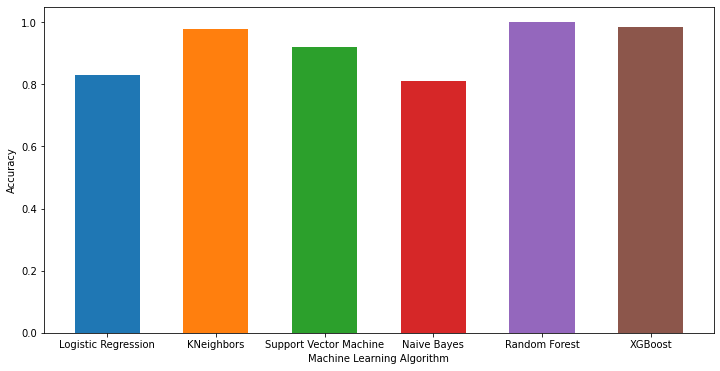

In [53]:
plt.figure(figsize=(12, 6))
plt.bar("Logistic Regression",accuracy_log,width=0.6)
plt.bar("KNeighbors",accuracy_knn,width=0.6)
plt.bar("Support Vector Machine",accuracy_svc,width=0.6)
plt.bar("Naive Bayes",accuracy_gnb,width=0.6)
plt.bar("Random Forest",accuracy_random,width=0.6)
plt.bar("XGBoost",accuracy_xgb,width=0.6)
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")

